<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_III_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

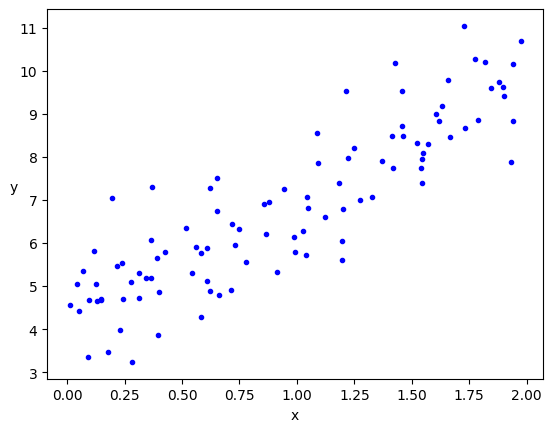

In [9]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [10]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [11]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [12]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

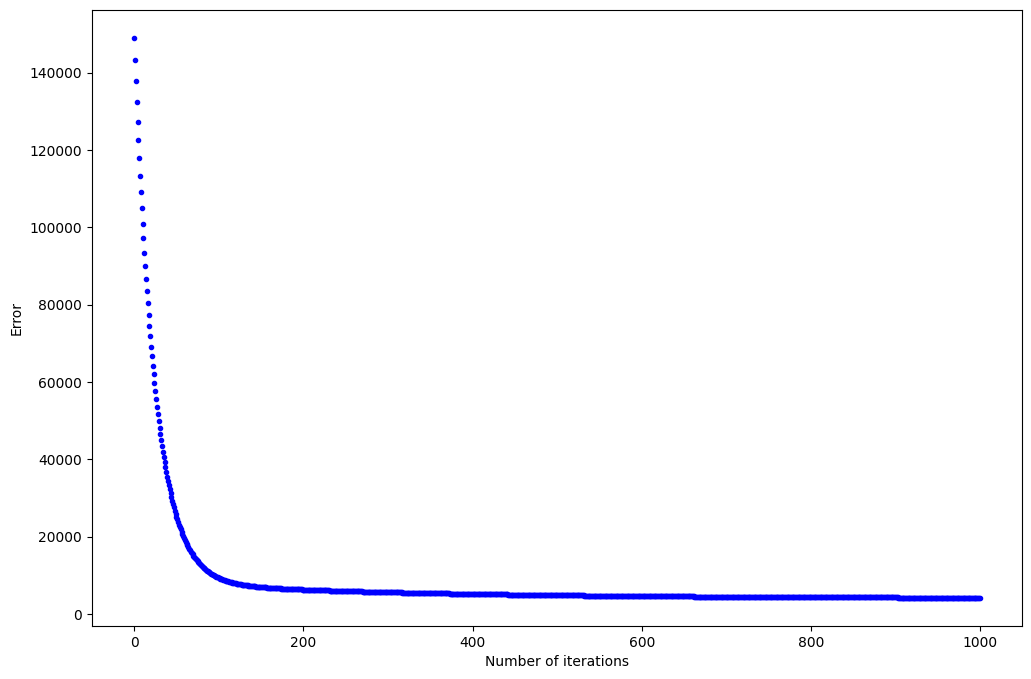

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

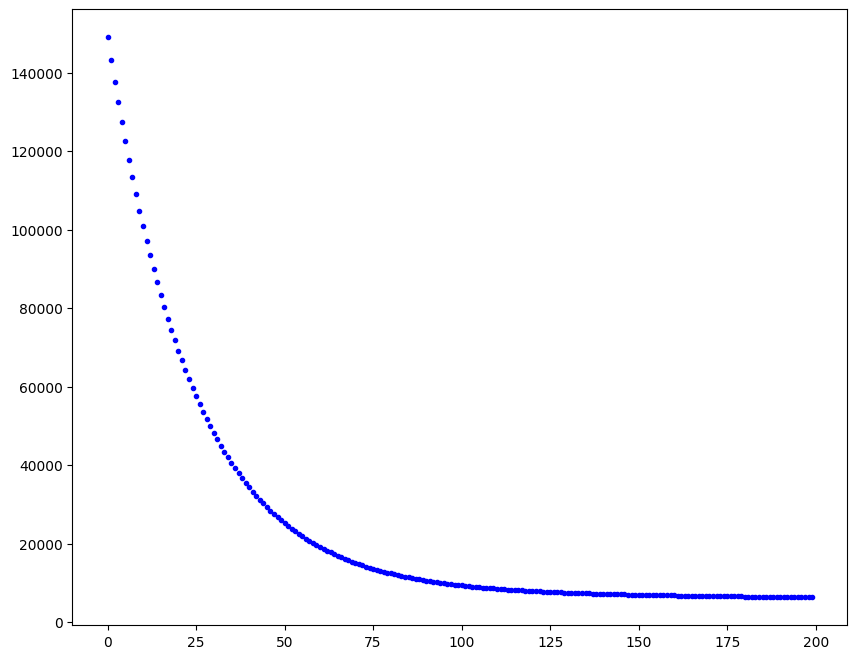

In [14]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [15]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [16]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


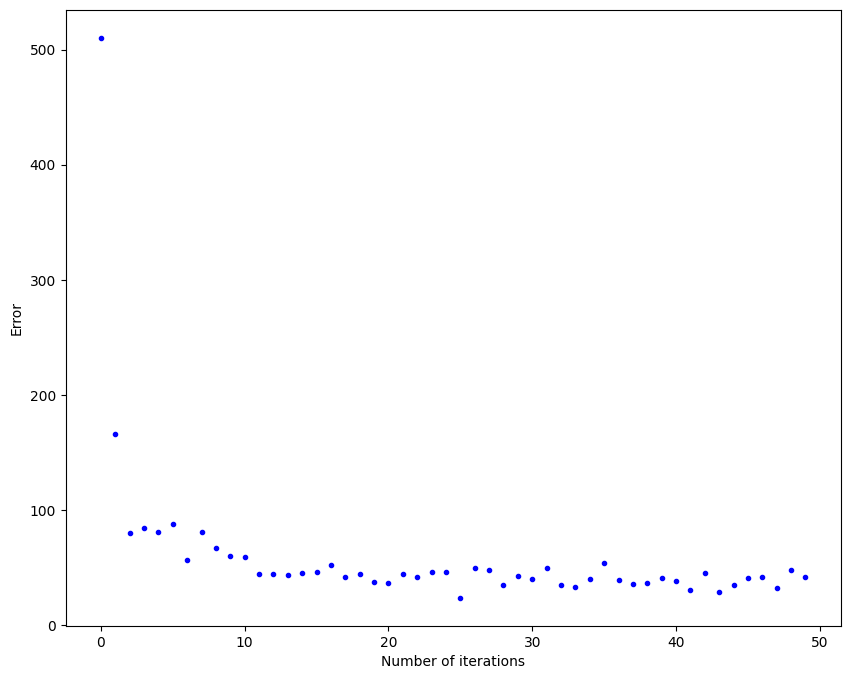

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [18]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [19]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


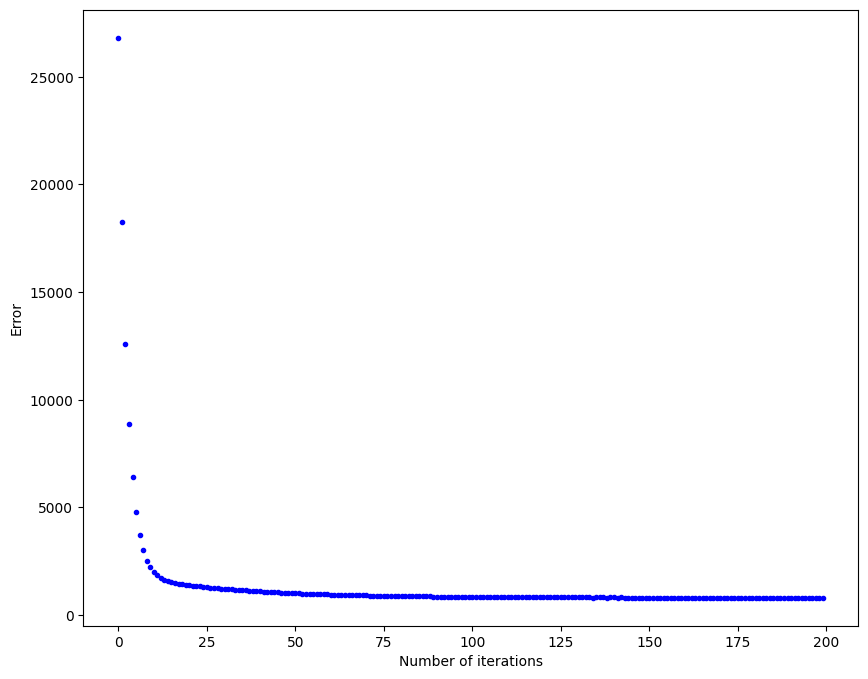

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

Batch Size: 5
y_pred[0]: 4.248, y_pred[1]: 2.741
Final error: 201.209

Batch Size: 10
y_pred[0]: 4.187, y_pred[1]: 2.797
Final error: 402.949

Batch Size: 50
y_pred[0]: 4.154, y_pred[1]: 2.824
Final error: 2017.137



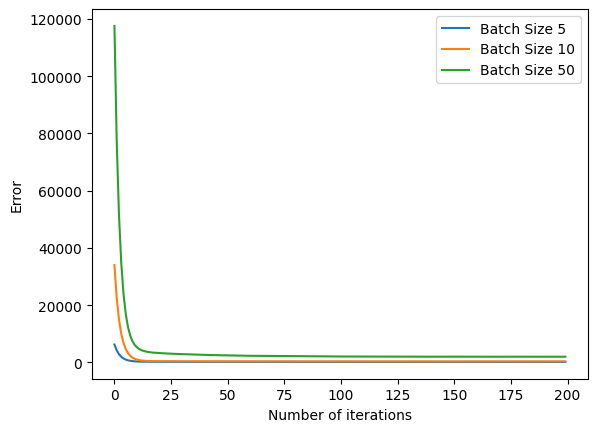

In [21]:
#1.Change batch size in mini-batch gradient descent.

# Minibatch Gradient Descent with varying batch size
lr = 0.1
n_iter = 200

# Try batch sizes of 5, 10, and 50
for batch_size in [5, 10, 50]:
    y_pred = np.random.randn(2, 1)  # Reinitialize y_pred for each run
    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)

    print(f'Batch Size: {batch_size}')
    print('y_pred[0]: {:0.3f}, y_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
    print('Final error: {:0.3f}\n'.format(cost_history[-1]))

    plt.plot(range(n_iter), cost_history, label=f'Batch Size {batch_size}')

plt.ylabel('Error')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()


In [34]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, X.shape[1]))  # Fix: Use correct shape based on X's columns

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T  # Fix: Match shape for storage
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            # No need to add bias term again here; it's already in X
            prediction = np.dot(X_i, y_pred)

            # Gradient update
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history


Batch GD: y_pred[0]: 151.328
SGD: y_pred[0]: 152.006
Mini-batch GD: y_pred[0]: 151.288


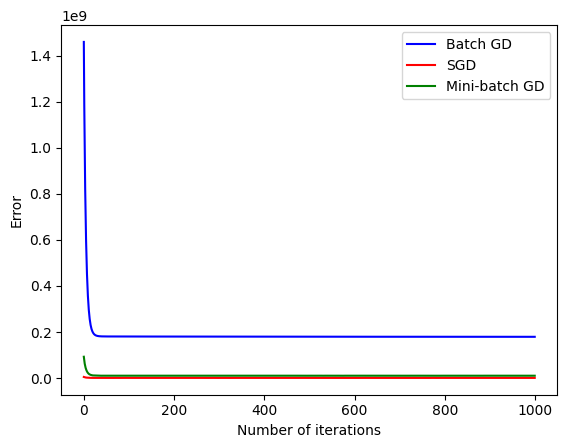

In [35]:
#2.Test all the three out on real datasets.

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target.reshape(-1, 1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term to X
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Batch Gradient Descent on Diabetes Dataset
y_pred = np.random.randn(X_train.shape[1], 1)
y_pred, cost_history, _ = gradient_descent(X_train, y_train, y_pred, learning_rate=0.1, iterations=1000)

print('Batch GD: y_pred[0]: {:0.3f}'.format(y_pred[0][0]))
plt.plot(range(1000), cost_history, 'b', label='Batch GD')

# Stochastic Gradient Descent on Diabetes Dataset
y_pred = np.random.randn(X_train.shape[1], 1)
y_pred, cost_history = stocashtic_gradient_descent(X_train, y_train, y_pred, learning_rate=0.1, iterations=1000)

print('SGD: y_pred[0]: {:0.3f}'.format(y_pred[0][0]))
plt.plot(range(1000), cost_history, 'r', label='SGD')

# Mini-batch Gradient Descent on Diabetes Dataset
y_pred = np.random.randn(X_train.shape[1], 1)
y_pred, cost_history = minibatch_gradient_descent(X_train, y_train, y_pred, learning_rate=0.1, iterations=1000, batch_size=20)

print('Mini-batch GD: y_pred[0]: {:0.3f}'.format(y_pred[0][0]))
plt.plot(range(1000), cost_history, 'g', label='Mini-batch GD')

plt.ylabel('Error')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()



Learning Rate: 0.01

Learning Rate: 0.1

Learning Rate: 0.5


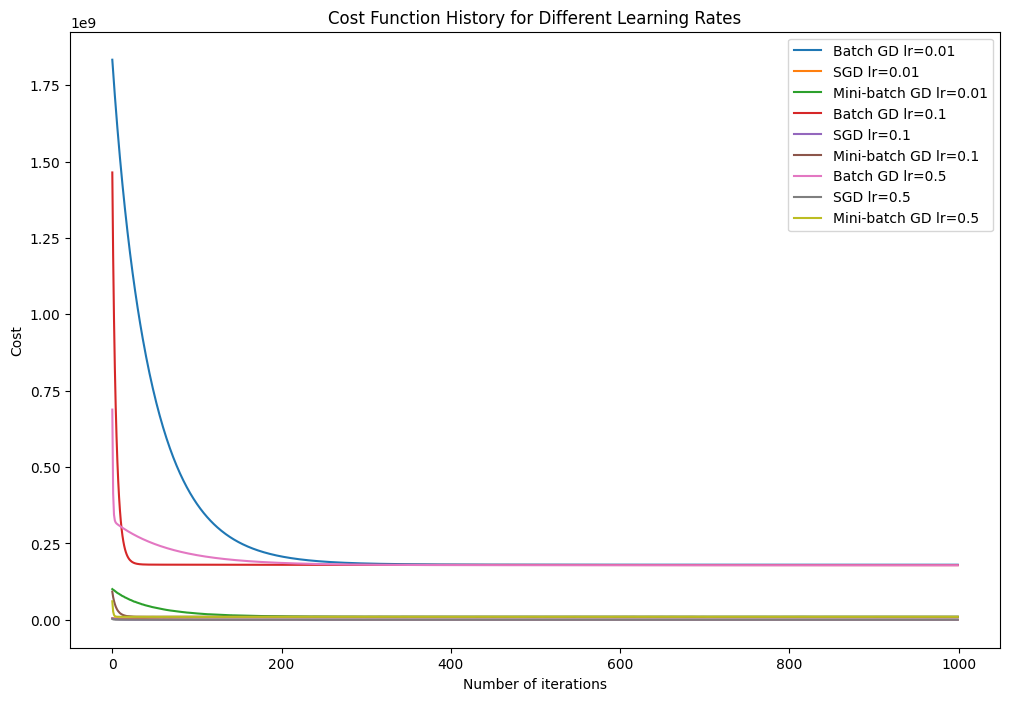

In [36]:
##3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target.reshape(-1, 1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term to X
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Define Gradient Descent Variants (from earlier)
# Assuming you have already defined gradient_descent, stocashtic_gradient_descent, minibatch_gradient_descent, and cal_cost functions

# List of learning rates to test
learning_rates = [0.01, 0.1, 0.5]

# Number of iterations
n_iter = 1000
batch_size = 20  # for mini-batch

# Function to run all gradient descents for a given learning rate
def run_experiments(learning_rate):
    print(f"\nLearning Rate: {learning_rate}")

    # Batch Gradient Descent
    y_pred = np.random.randn(X_train.shape[1], 1)
    y_pred, cost_history_batch, _ = gradient_descent(X_train, y_train, y_pred, learning_rate=learning_rate, iterations=n_iter)
    plt.plot(range(n_iter), cost_history_batch, label=f'Batch GD lr={learning_rate}')

    # Stochastic Gradient Descent
    y_pred = np.random.randn(X_train.shape[1], 1)
    y_pred, cost_history_sgd = stocashtic_gradient_descent(X_train, y_train, y_pred, learning_rate=learning_rate, iterations=n_iter)
    plt.plot(range(n_iter), cost_history_sgd, label=f'SGD lr={learning_rate}')

    # Mini-batch Gradient Descent
    y_pred = np.random.randn(X_train.shape[1], 1)
    y_pred, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, y_pred, learning_rate=learning_rate, iterations=n_iter, batch_size=batch_size)
    plt.plot(range(n_iter), cost_history_minibatch, label=f'Mini-batch GD lr={learning_rate}')

# Plotting the results for each learning rate
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    run_experiments(lr)

plt.title('Cost Function History for Different Learning Rates')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()



Explanation:
Learning Rates Tested: The code tests three different learning rates (0.01, 0.1, 0.5) for Batch GD, SGD, and Mini-batch GD.

Comparison: The cost history (error reduction) is plotted over 1000 iterations for each gradient descent method.

Plots: The final plot shows the convergence of each method for different learning rates, allowing you to visually compare how the learning rate affects the speed and smoothness of convergence.

Analysis:

Batch GD: Typically converges more smoothly since it uses the entire dataset for each update, but it can be slower with smaller learning rates.

SGD: Has more variance in the updates since it uses one random example per update. It may converge faster with larger learning rates but can be less stable.

Mini-batch GD: Balances between Batch GD and SGD. It tends to converge faster than Batch GD and is more stable than SGD.


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.


**Correct Option:**

(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.